In [74]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import metrics
%matplotlib inline

In [18]:
data = fetch_california_housing()
print(data.keys())
print(type(data))

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
<class 'sklearn.utils._bunch.Bunch'>


In [11]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [19]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [20]:
df.tail(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [23]:
df['MEDV'] = data.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [21]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   MEDV        20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [26]:
df.isnull().sum()


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
MEDV          0
dtype: int64

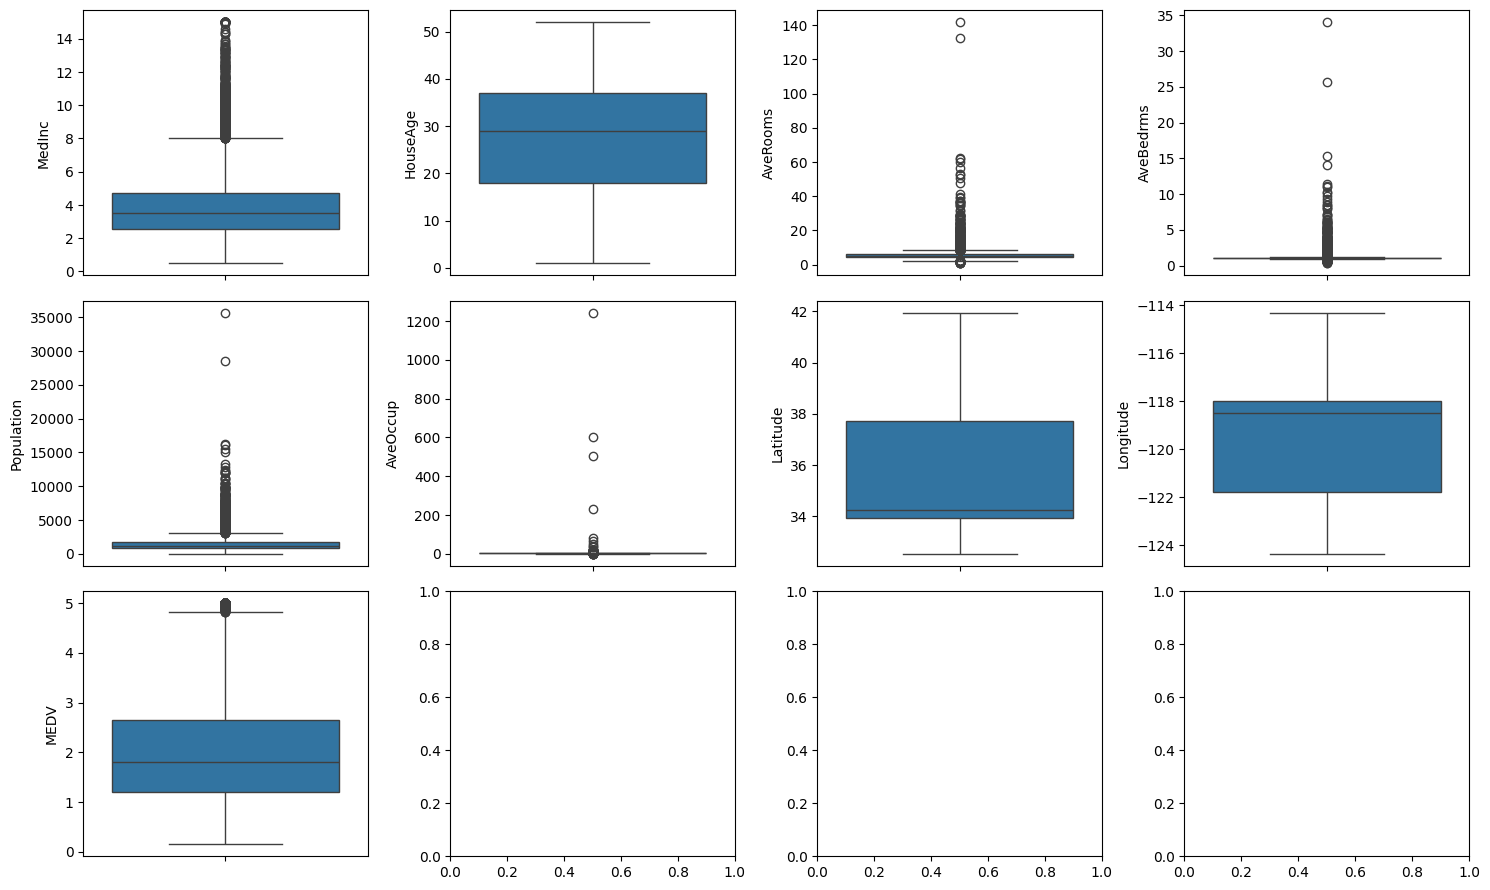

In [51]:
fig, ax = plt.subplots(3, 4,figsize=(15, 9))
ax = ax.flatten()
# for col in df.columns:
#     df[col].plot(kind='box')
for i,col in enumerate(df.columns):
  seaborn.boxplot(data=df[col], ax=ax[i])
plt.tight_layout()
plt.show()
# seaborn.boxplot(data=df.MedInc, ax=ax)

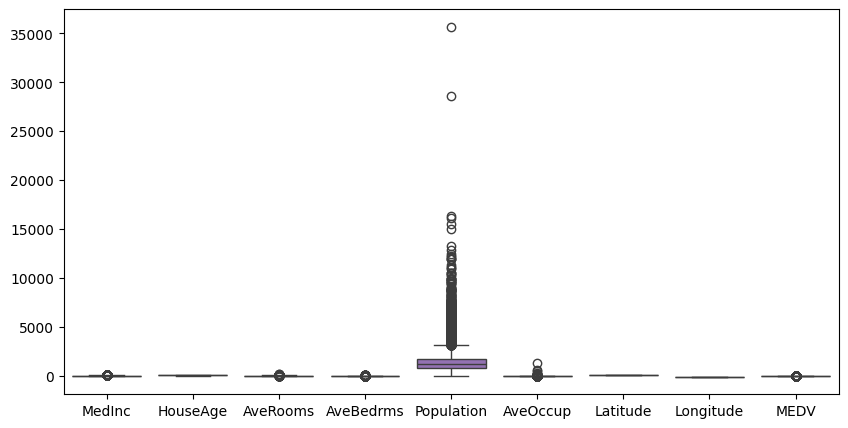

In [48]:
fig2, axes = plt.subplots(figsize=(10, 5))

# drawing the plot
seaborn.boxplot(data=df, ax=axes)
plt.show()

<Axes: >

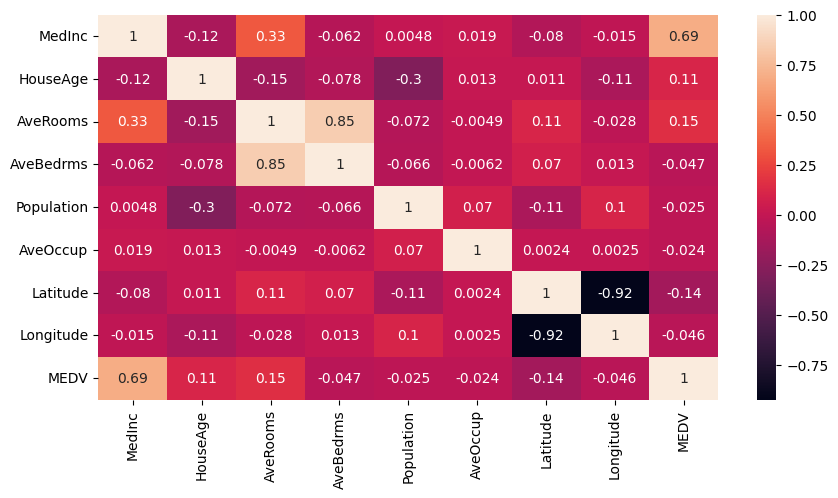

In [56]:
fig2, axes = plt.subplots(figsize=(10, 5))
seaborn.heatmap(df.corr(), annot=True)
#MEDV and MEDINC has intermediate relation
#AR and Medinc has some weak relaation
#Ar and Ab has a strong relation

<Axes: xlabel='MEDV', ylabel='Density'>

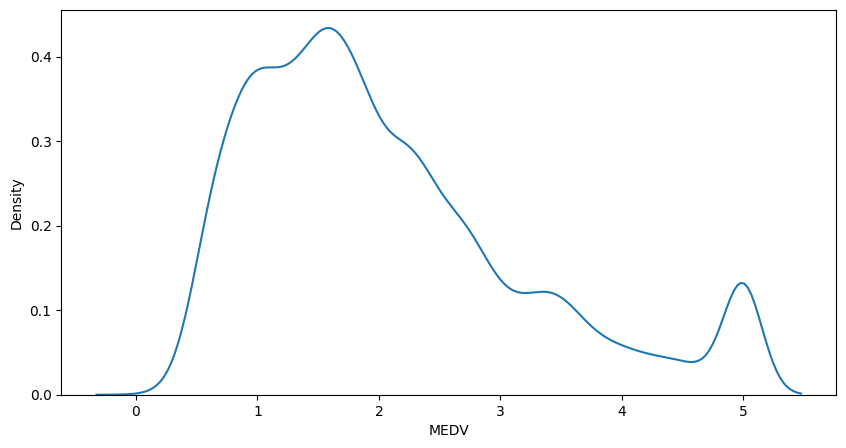

In [55]:
fig2, axes = plt.subplots(figsize=(10, 5))
seaborn.kdeplot(data=df.MEDV, ax=axes)

In [69]:
# prompt: create a dataframe of the above data set as df 2

df2 = pd.DataFrame(data.data, columns=data.feature_names)
df2['MEDV'] = data.target

scaler = MinMaxScaler()
df2[df2.columns] = scaler.fit_transform(df2)
df2

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155,0.902266
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151,0.708247
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159,0.695051
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163,0.672783
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163,0.674638
...,...,...,...,...,...,...,...,...,...
20635,0.073130,0.470588,0.029769,0.023715,0.023599,0.001503,0.737513,0.324701,0.130105
20636,0.141853,0.333333,0.037344,0.029124,0.009894,0.001956,0.738576,0.312749,0.128043
20637,0.082764,0.313725,0.030904,0.023323,0.028140,0.001314,0.732200,0.311753,0.159383
20638,0.094295,0.333333,0.031783,0.024859,0.020684,0.001152,0.732200,0.301793,0.143713


<Axes: xlabel='MEDV', ylabel='Density'>

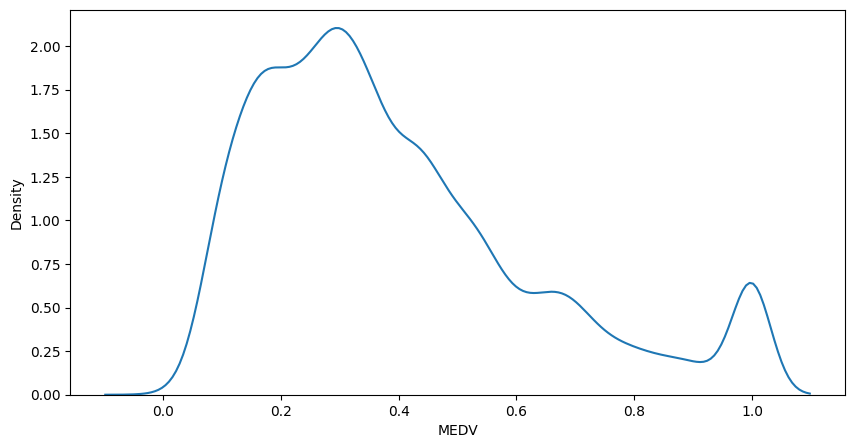

In [70]:
fig2, axes = plt.subplots(figsize=(10, 5))

seaborn.kdeplot(data=df2.MEDV, ax=axes)

In [64]:
x1 = df.drop('MEDV', axis=1)
y1 = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.25, random_state=42)

In [66]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [72]:
metrics.mean_absolute_error(y_test, y_pred)

0.5296964012919464

In [78]:
R_regressor = RandomForestRegressor()
R_regressor.fit(X_train, y_train)
y_pred2 = R_regressor.predict(X_test)
metrics.mean_absolute_error(y_test, y_pred2)

0.3294806734689924

In [85]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred3 = svr.predict(X_test)
metrics.mean_absolute_error(y_test, y_pred3)

0.8674205743031635

In [81]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred4 = dt.predict(X_test)
metrics.mean_absolute_error(y_test, y_pred4)


0.46786342248062013

In [82]:
x2 = df2.drop('MEDV', axis=1)
y2 = df2['MEDV']
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2,y2, test_size=0.25, random_state=42)

In [83]:
regressor = LinearRegression()
regressor.fit(X_train2, y_train2)
y_pred_ = regressor.predict(X_test2)
metrics.mean_absolute_error(y_test2, y_pred_)

0.10921530247131876

In [89]:
R_regressor = RandomForestRegressor()
R_regressor.fit(X_train2, y_train2)
y_pred2_ = R_regressor.predict(X_test2)
metrics.mean_absolute_error(y_test2, y_pred2_)

0.0677353914292178

In [90]:
svr = SVR()
svr.fit(X_train2, y_train2)
y_pred3_ = svr.predict(X_test2)
metrics.mean_absolute_error(y_test2, y_pred3_)

0.0949321312617015

In [92]:
dt = DecisionTreeRegressor()
dt.fit(X_train2, y_train2)
y_pred4_ = dt.predict(X_test2)
metrics.mean_absolute_error(y_test2, y_pred4_)

0.09520217034827859

In [96]:
x1_ = np.array(X_test2["MedInc"])
y1_ = np.array(y_pred)
m,b=np.polyfit(x1_,y1_,deg=1)

Text(0, 0.5, 'Median Value')

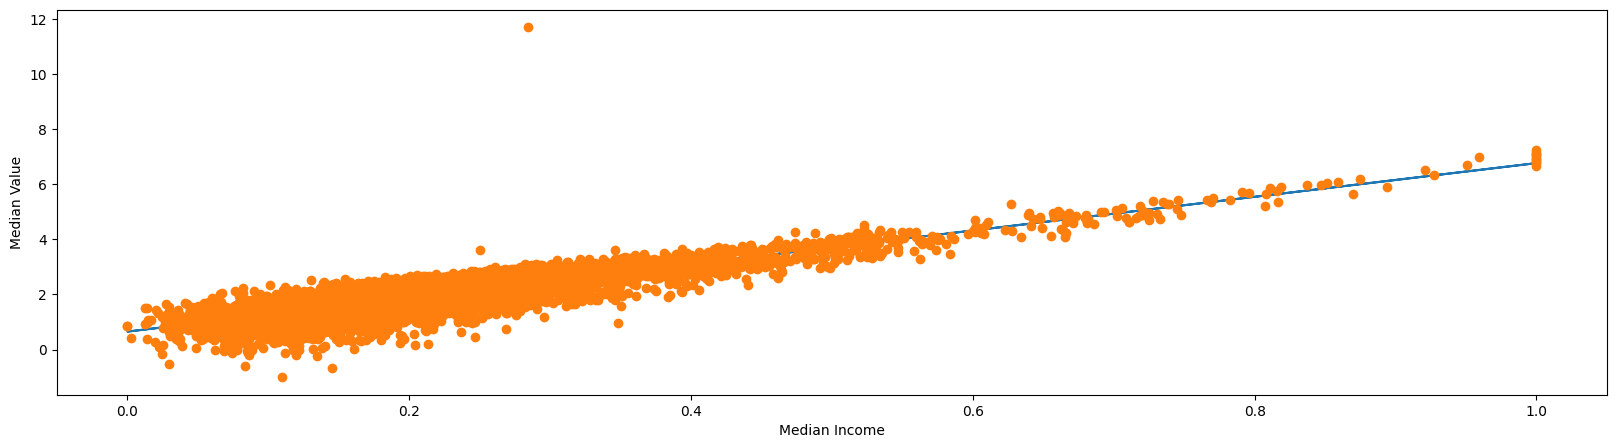

In [102]:
# fig4,axe = plt.subplots(figsize=(10,5))
plt.figure(figsize=(20,5))
plt.plot(X_test2['MedInc'], m*X_test2['MedInc'] + b)
plt.plot(X_test2['MedInc'],y_pred,'o')

plt.xlabel("Median Income")
plt.ylabel("Median Value")

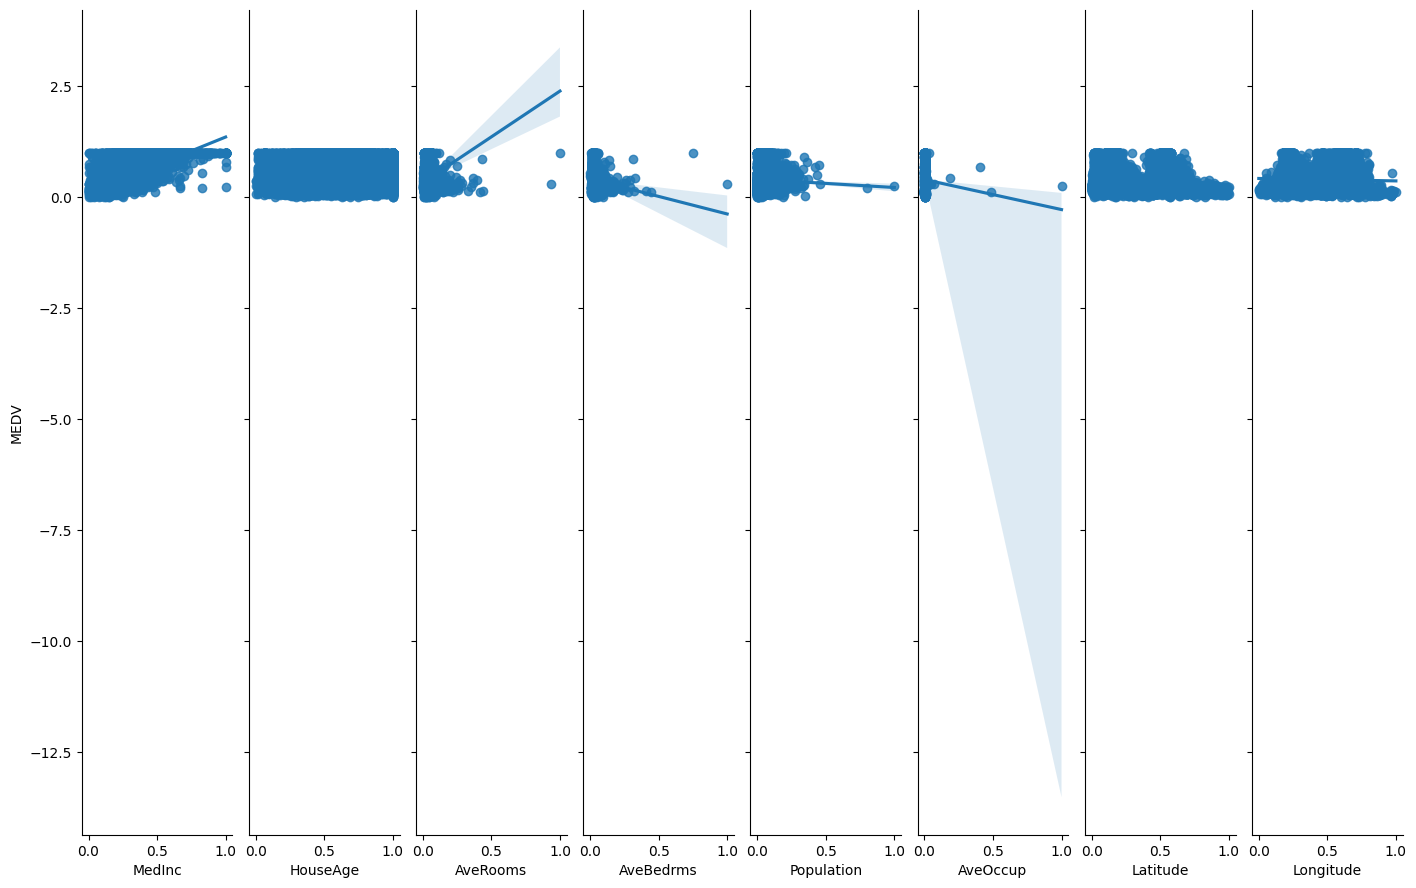

In [108]:
seaborn.pairplot(df2, x_vars=["MedInc",	"HouseAge",	'AveRooms',	'AveBedrms',	'Population',	'AveOccup',	'Latitude',	'Longitude'], y_vars='MEDV', height=9, aspect=0.2, kind='reg')